In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import klib as k
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, roc_curve
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv('./gender.csv')
df.head(12)

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color,Unnamed: 9
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue,NaN
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green,NaN
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple,NaN
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red,NaN
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow,NaN
5,male,45,190,92,Business Consultant,Master's Degree,Divorced,110000,Black,NaN
6,female,27,163,55,Marketing Specialist,Bachelor's Degree,Single,50000,Pink,NaN
7,male,52,179,83,CEO,Doctorate Degree,Married,500000,Blue,NaN
8,female,31,168,61,Project Manager,Bachelor's Degree,Married,80000,Green,NaN
9,male,36,177,76,Engineer,Master's Degree,Married,95000,Orange,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Gender           131 non-null    object 
 1    Age              131 non-null    int64  
 2    Height (cm)      131 non-null    int64  
 3    Weight (kg)      131 non-null    int64  
 4    Occupation       131 non-null    object 
 5    Education Level  131 non-null    object 
 6    Marital Status   131 non-null    object 
 7    Income (USD)     131 non-null    int64  
 8    Favorite Color   131 non-null    object 
 9   Unnamed: 9        0 non-null      float64
dtypes: float64(1), int64(4), object(5)
memory usage: 10.4+ KB


In [4]:
df.drop(columns='Unnamed: 9', inplace=True)

In [5]:
k.clean_column_names(df)

,gender,age,height_cm,weight_kg,occupation,education_level,marital_status,income_usd,favorite_color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow
...,...,...,...,...,...,...,...,...,...
126,female,32,170,64,Nurse,Associate's Degree,Single,60000,Orange
127,male,38,176,79,Project Manager,Bachelor's Degree,Married,90000,Black
128,female,27,162,55,Graphic Designer,Associate's Degree,Single,55000,Green
129,male,33,175,77,Sales Representative,Bachelor's Degree,Married,80000,Yellow


In [6]:
df = df.rename(columns={'income_usd':'Income'})
df = df.rename(columns={'height_cm':'height'})
df = df.rename(columns={'weight_kg':'weight'})

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,131.0,34.564885,5.984723,24.0,29.0,34.0,39.0,52.0
height,131.0,173.198473,8.045467,160.0,166.0,175.0,180.5,190.0
weight,131.0,71.458015,12.648052,50.0,60.0,75.0,83.0,94.0
Income,131.0,93206.106870,74045.382919,30000.0,55000.0,75000.0,100000.0,500000.0


In [8]:
df.shape

(131, 9)

In [9]:
df.isnull().sum()

gender             0
age                0
height             0
weight             0
occupation         0
education_level    0
marital_status     0
Income             0
favorite_color     0
dtype: int64

In [10]:
df.marital_status.value_counts()

Married      41
Single       38
 Married     24
 Single      21
 Divorced     4
 Widowed      2
Divorced      1
Name: marital_status, dtype: int64

In [11]:
df['marital_status'].replace(' Single', 'Single', inplace=True)
df['marital_status'].replace(' Married', 'Married', inplace=True)
df['marital_status'].replace(' Divorced', 'Divorced', inplace=True)

In [12]:
df.marital_status.value_counts()

Married     65
Single      59
Divorced     5
 Widowed     2
Name: marital_status, dtype: int64

In [13]:
df['education_level'].replace(" Bachelor's Degree", "Bachelor's Degree", inplace=True)
df['education_level'].replace(" Associate's Degree", "Associate's Degree", inplace=True)
df['education_level'].replace(" Master's Degree", "Master's Degree", inplace=True)
df['education_level'].replace(" Doctorate Degree", "Doctorate Degree", inplace=True)

In [14]:
df.education_level.value_counts()

Bachelor's Degree     78
Master's Degree       20
Associate's Degree    18
Doctorate Degree      15
Name: education_level, dtype: int64

In [22]:
df.occupation.value_counts()

Teacher                  7
Nurse                    6
Writer                   6
Project Manager          6
Marketing Specialist     6
Lawyer                   6
Graphic Designer         6
Doctor                   6
Engineer                 6
 Teacher                 5
Architect                4
Sales Representative     4
IT Manager               4
 Writer                  3
 Sales Representative    3
Business Analyst         3
Accountant               3
CEO                      3
 IT Manager              3
 Analyst                 3
 Nurse                   3
 Architect               3
 Accountant              3
 Engineer                3
 Project Manager         3
 CEO                     3
 Marketing Specialist    3
Analyst                  3
 Graphic Designer        3
 Lawyer                  3
 Doctor                  3
 Business Analyst        2
 Software Engineer       1
 Business Consultant     1
Software Developer       1
Name: occupation, dtype: int64

In [46]:
df['occupation'].replace(" Teacher", "Teacher", inplace=True)
df['occupation'].replace(" Nurse", "Nurse", inplace=True)
df['occupation'].replace(" Writer", "Writer", inplace=True)
df['occupation'].replace(" Project Manager", "Project Manager", inplace=True)
df['occupation'].replace(" Marketing Specialist", "Marketing Specialist", inplace=True)
df['occupation'].replace(" Lawyer", "Lawyer", inplace=True)
df['occupation'].replace(" Graphic Designer", "Graphic Designer", inplace=True)
df['occupation'].replace(" Doctor", "Doctor", inplace=True)
df['occupation'].replace(" Engineer", "Engineer", inplace=True)
df['occupation'].replace(" Architect", "Architect", inplace=True)
df['occupation'].replace(" Sales Representative", "Sales Representative", inplace=True)
df['occupation'].replace(" IT Manager", "IT Manager", inplace=True)
df['occupation'].replace(" Business Analyst", "Business Analyst", inplace=True)
df['occupation'].replace(" Accountant", "Accountant", inplace=True)
df['occupation'].replace(" CEO", "CEO", inplace=True)
df['occupation'].replace(" Analyst", "Analyst", inplace=True)
df['occupation'].replace(" Analyst", "Analyst", inplace=True)

In [49]:
df.favorite_color.value_counts()

Blue       13
Green      13
Purple     11
Red        11
Yellow     10
Orange      9
 Green      8
Black       8
 Blue       8
 Pink       6
 Yellow     6
 Red        6
 Purple     6
 Grey       4
 Black      4
Grey        4
 Orange     3
Pink        1
Name: favorite_color, dtype: int64

In [54]:
df['favorite_color'].replace(" Blue", "Blue", inplace=True)
df['favorite_color'].replace(" Green", "Green", inplace=True)
df['favorite_color'].replace(" Purple", "Purple", inplace=True)
df['favorite_color'].replace(" Red", "Red", inplace=True)
df['favorite_color'].replace(" Yellow", "Yellow", inplace=True)
df['favorite_color'].replace(" Orange", "Orange", inplace=True)
df['favorite_color'].replace(" Black", "Black", inplace=True)
df['favorite_color'].replace(" Pink", "Pink", inplace=True)
df['favorite_color'].replace(" Grey", "Grey", inplace=True)

In [62]:
df['gender'].replace(" male", "male", inplace=True)
df['gender'].replace(" female", "female", inplace=True)

In [63]:
df.gender.value_counts()

male      68
female    63
Name: gender, dtype: int64

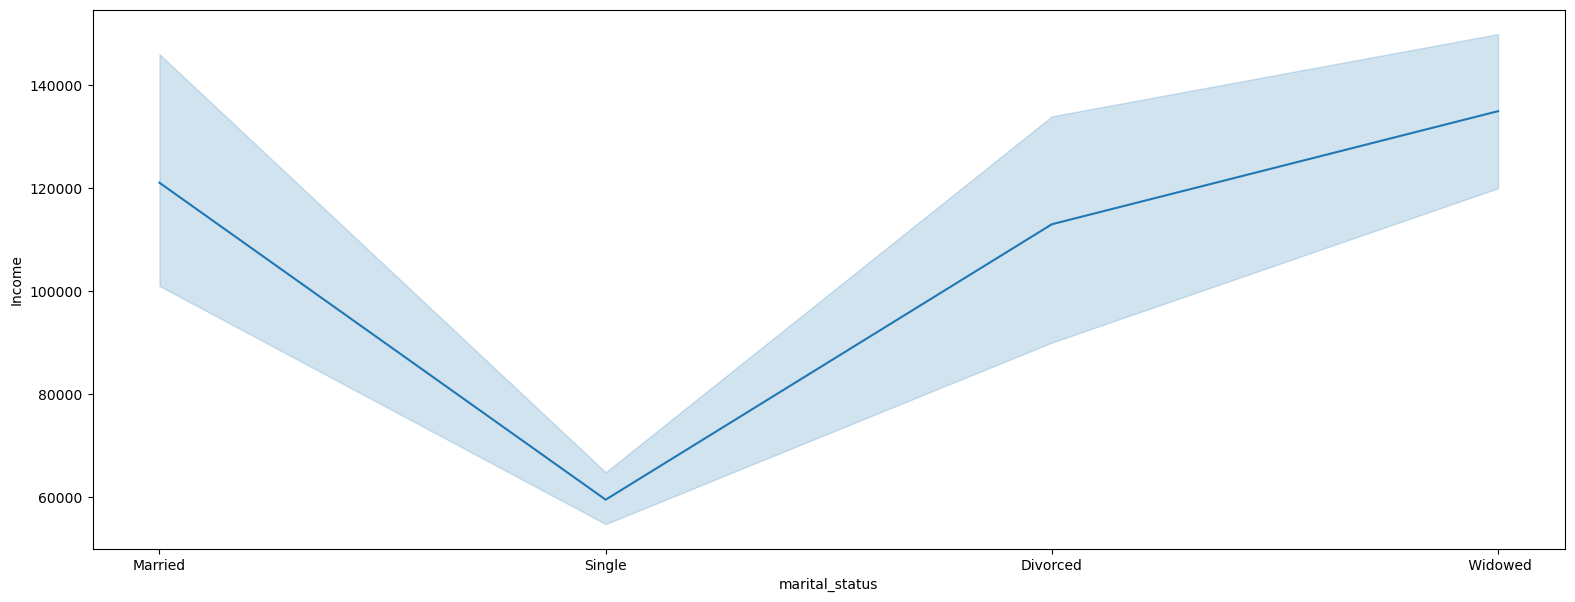

In [66]:
plt.figure(figsize=(19,7))
sns.lineplot(x='marital_status',y='Income', data=df)
plt.show()

<AxesSubplot:ylabel='Income'>

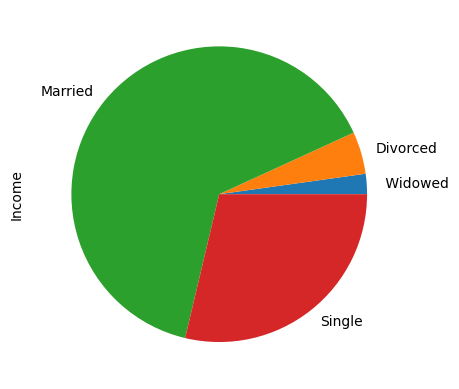

In [67]:
gender_Weight=df.groupby(['marital_status'])['Income'].sum()
gender_Weight.plot.pie()